# Obtendo o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
!unzip -qq -n cassava-leaf-disease-classification.zip?dl=0

--2020-12-20 22:19:20--  https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip [following]
--2020-12-20 22:19:21--  https://www.dropbox.com/s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd20ec334b6b55b9cc33990db34.dl.dropboxusercontent.com/cd/0/inline/BFcAAYvx3U35H2lkv6u_LTEoxA-Gdz2Zb8p9Bvo6GY89wZNwK26yC1NJyY7f5_LaHkb8gq7A_5Ywoq2n6DfKJjNrxaALxVI3zYgld5CSiSSok2HwQH0iQeFH_7OUB_kDIac/file# [following]
--2020-12-20 22:19:21--  https://ucd20ec334b6b55b9cc33990db34.dl.dropboxusercontent.com/cd/0/inline/BFcAAYvx3U35H2lkv6u_LTEox

In [ ]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


# Instalando fastai

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 194kB 9.0MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 


In [ ]:
from fastai.vision.all import *

# Carregando o dataset e redimensionando

In [ ]:
dls = ImageDataLoaders.from_df(df_train, path="./train_images/", item_tfms=Resize(224))

# Treinando um modelo

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=[error_rate,accuracy], pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [10]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.037613,0.725074,0.253330,0.746670,06:58


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.628696,0.565655,0.193971,0.806029,08:46
1,0.523427,0.548265,0.182987,0.817013,08:46
2,0.463925,0.545846,0.182286,0.817714,08:44
3,0.345384,0.541003,0.169666,0.830334,08:45
4,0.245161,0.600966,0.176677,0.823323,08:46
5,0.135170,0.629476,0.171068,0.828932,08:45
6,0.066445,0.708384,0.153541,0.846459,08:44
7,0.029062,0.788308,0.162421,0.837579,08:46
8,0.013606,0.772026,0.155410,0.844590,08:46
9,0.009845,0.768897,0.153774,0.846226,08:48


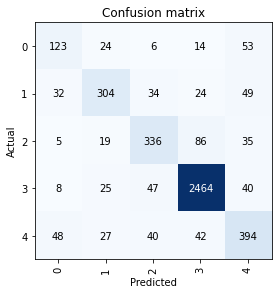

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
# Aqui gravamos o modelo treinado no Google Drive, com o nome "meuModelo", para poder importar no Kaggle e fazer uma submissão
# https://www.kaggle.com/ricardoaraujo/cassava-submission-template

nome_do_modelo = 'resnet152_tune_10'
path = F"/content/gdrive/MyDrive/modelos/{nome_do_modelo}" 
learn.save(path)

Path('/content/gdrive/MyDrive/modelos/resnet152_tune_10.pth')